In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Bayesian Ridge Regression

Se realiza un entrenamiento con una regresión bayesiana de ridge, realizando una transformación en la variable objetivo SalesPrice a log, para que sea más cercana a una gassiana y de esta manera manera ser consecuentes con las suposiciones del modelo y además obteniendo un mejor resultado.

In [3]:
# Your selected columns
selected_num_columns = ['LotFrontage', 'LotArea', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']
categorical_columns_filtered = ['Street', 'LandContour', 'LandSlope', 'Utilities', 'Neighborhood',
                                  'Condition1', 'Condition2', 'HouseStyle', 'BldgType', 'OverallQual',
                                  'OverallCond', 'RoofStyle', 'Exterior1st', 'ExterCond', 'BsmtCond',
                                  'BsmtFinType1', 'CentralAir', 'Heating', 'KitchenQual',
                                  'TotRmsAbvGrd', 'GarageType', 'GarageCond', 'PavedDrive',
                                  'SaleType', 'SaleCondition', 'Fireplaces', 'GarageCars']

categorical_columns_filtered = [ 'LandSlope',  'Neighborhood',
                                  'Condition1',  'HouseStyle', 'BldgType', 'OverallQual',
                                  'OverallCond', 'RoofStyle', 'Exterior1st', 'ExterCond', 'BsmtCond',
                                  'BsmtFinType1', 'KitchenQual',
                                  'TotRmsAbvGrd', 'GarageType',  'PavedDrive',
                                  'SaleType', 'SaleCondition', 'Fireplaces', 'GarageCars']

In [4]:
train_set = pd.read_csv('../data/train.csv')
test_set = pd.read_csv('../data/test.csv')

In [5]:
for column in categorical_columns_filtered[3:]:
    print(train_set[column].value_counts())
    

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64
BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64
OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64
OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64
RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64
Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64
ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int6

In [6]:
#train_set = train_set[selected_num_columns + categorical_columns_filtered]

In [7]:
# Define the target and features
# SalePrice is the target, so exclude it from features.
#numeric_features = [col for col in selected_num_columns if col != 'SalePrice']
numeric_columns = train_set.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'SalePrice' in numeric_columns:
    numeric_columns.remove('SalePrice')

categorical_columns = train_set.select_dtypes(include=['object']).columns.tolist()

#X = train_set[[col for col in numeric_columns if col != 'SalePrice'] + categorical_columns_filtered]
X = train_set.drop('SalePrice', axis=1)
#y = d['SalePrice']
train_set['SalePrice_log'] = np.log1p(train_set['SalePrice'])
y = train_set['SalePrice_log']

In [8]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features: imputation and one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine numeric and categorical transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)



In [9]:

# Create a pipeline with the preprocessor and the Bayesian Ridge regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('br', BayesianRidge())
])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
param_grid = {
    'br__alpha_1': [1e-6, 1e-5, 1e-4],
    'br__lambda_1': [1e-6, 1e-5, 1e-4]
}

In [12]:
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_median_absolute_error',  # using negative MSE as the metric
    n_jobs=-1
)



In [13]:
print(pipeline.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'br', 'preprocessor__force_int_remainder_cols', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__imputer', 'preprocessor__num__scaler', 'preprocessor__num__imputer__add_indicator', 'preprocessor__num__imputer__copy', 'preprocessor__num__imputer__fill_value', 'preprocessor__num__imputer__keep_empty_features', 'preprocessor__num__imputer__missing_values', 'preprocessor__num__imputer__strategy', 'preprocessor__num__scaler__copy', 'preprocessor__num__scaler__with_mean', 'preprocessor__num__scaler__with_std', 'preprocessor__cat__memory', 'preprocessor__cat__steps', 'preprocessor__cat__verbose', 'preprocessor__cat__impute

In [14]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
1130,1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal
1294,1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
860,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal


In [15]:
# Fit grid search on the training data
grid_search.fit(X_train, y_train)
# Output the best hyperparameters and score
print("Best parameters:", grid_search.best_params_)
print("Best negative MSE (CV):", grid_search.best_score_)

Best parameters: {'br__alpha_1': 1e-06, 'br__lambda_1': 0.0001}
Best negative MSE (CV): -0.06697542000321022


In [16]:
y_pred = grid_search.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
print("Test MSE:", mse_test)
print("Test R2:", r2_test)

Test MSE: 0.018623084700512563
Test R2: 0.900203708038192


In [17]:
import matplotlib.pyplot as plt

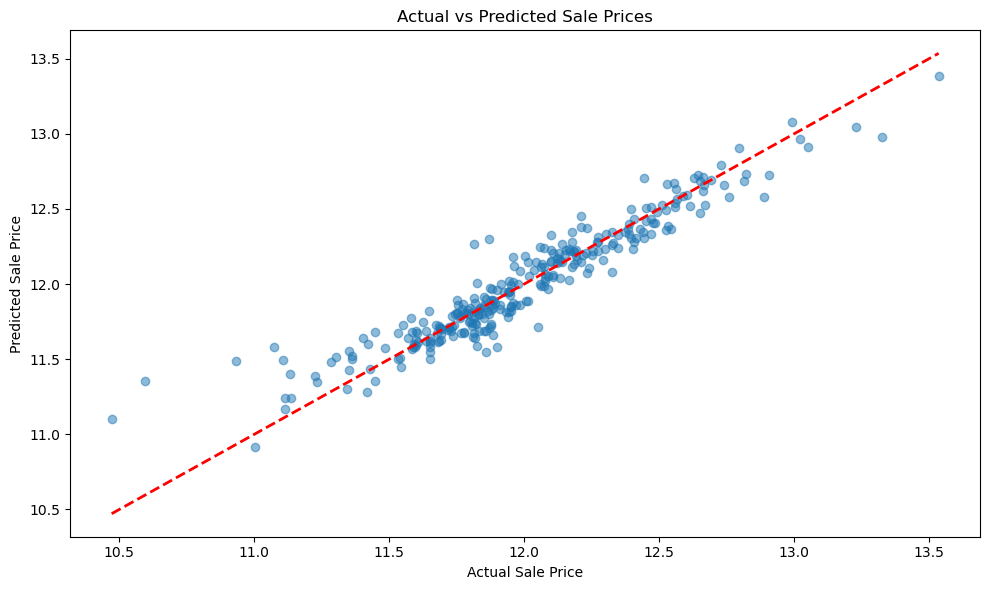

In [18]:
# Feature importance plot using the best model

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Prices')
plt.tight_layout()
plt.show()

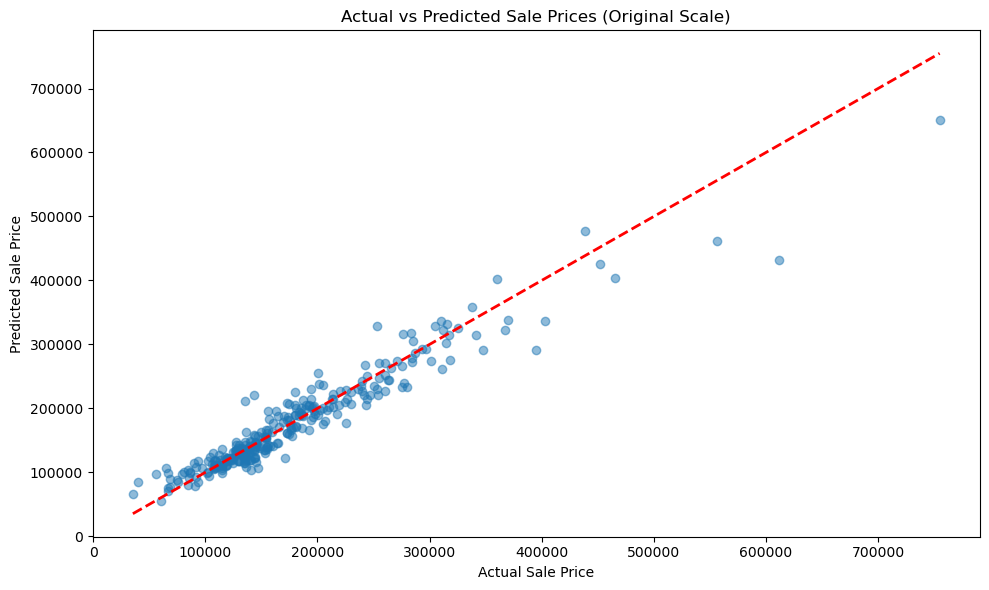

In [19]:
# Assuming y_test and y_pred are the log-transformed values:
y_test_orig = np.expm1(y_test)  # Convert back to original scale
y_pred_orig = np.expm1(y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_orig, y_pred_orig, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Prices (Original Scale)')
plt.tight_layout()
plt.show()

In [20]:
# Assuming `best_model` is your fitted pipeline with Bayesian Ridge in the final step:
best_model = grid_search.best_estimator_

# Extract the preprocessor and the Bayesian Ridge regressor from the pipeline:
preprocessor = best_model.named_steps['preprocessor']
br_model = best_model.named_steps['br']

# Get feature names from the preprocessor. This assumes you used a ColumnTransformer.
# For numeric features, the names are the original names.
# For categorical features processed by OneHotEncoder, we can get the transformed names.
numeric_cols = numeric_columns  # your original numeric feature list (without the target)
categorical_cols = categorical_columns  # your original categorical feature list

# Get the names for the categorical features from OneHotEncoder.
cat_ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feature_names = cat_ohe.get_feature_names_out(categorical_cols)

# Combine numeric and categorical feature names.
final_feature_names = numeric_cols + list(cat_feature_names)

# Extract the coefficients from the Bayesian Ridge regressor.
coefs = br_model.coef_

# Create a DataFrame to inspect the coefficients.
import pandas as pd
feature_importances = pd.DataFrame({
    'feature': final_feature_names,
    'coefficient': coefs
})
# Sort by absolute value of the coefficient.
feature_importances['abs_coef'] = feature_importances['coefficient'].abs()
feature_importances = feature_importances.sort_values(by='abs_coef', ascending=False)

print(feature_importances[['feature', 'coefficient']])


                   feature  coefficient
125       RoofMatl_ClyTile    -0.082826
86    Neighborhood_StoneBr     0.081100
70    Neighborhood_Crawfor     0.080391
4              OverallQual     0.075731
135    Exterior1st_BrkFace     0.066474
..                     ...          ...
155    Exterior2nd_MetalSd     0.000346
98       Condition2_Artery     0.000276
256          GarageCond_TA     0.000160
132    Exterior1st_AsbShng    -0.000090
281  SaleCondition_AdjLand    -0.000012

[286 rows x 2 columns]


In [21]:
numeric_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

Selected features:
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition2_Feedr

c:\Users\maryi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [14, 29] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


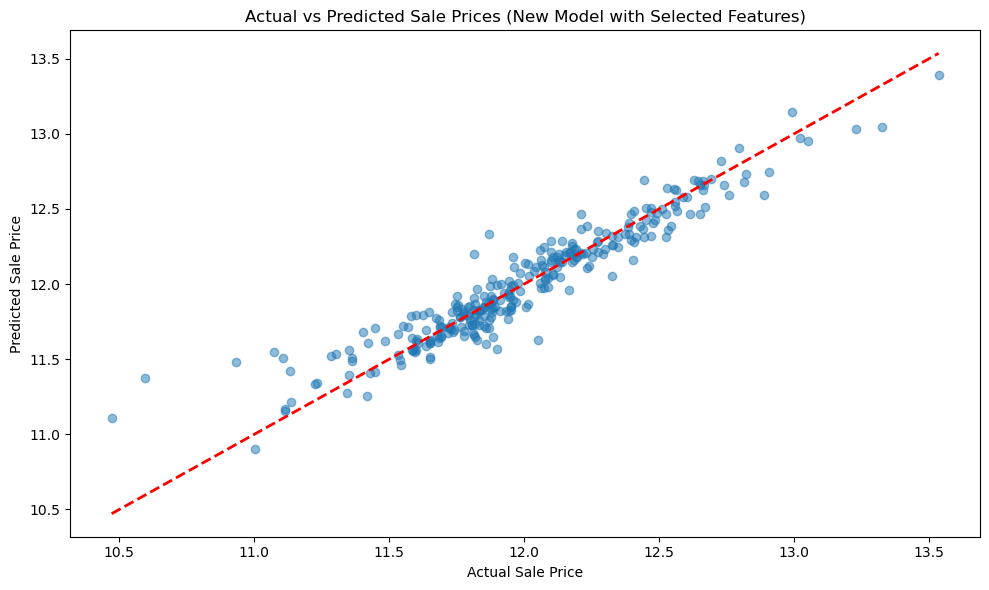

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import BayesianRidge
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Assume df is your DataFrame loaded with your data and contains the target column 'SalePrice'

# Identify numeric columns and remove 'SalePrice'
numeric_columns = train_set.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'SalePrice' in numeric_columns:
    numeric_columns.remove('SalePrice')
    numeric_columns.remove('SalePrice_log')

# Identify categorical columns
categorical_columns = train_set.select_dtypes(include=['object']).columns.tolist()

# Build a pipeline for numeric features: fill missing values with mean and scale.
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Build a pipeline for categorical features: fill missing values with mode and convert to dummy variables.
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

# Combine both pipelines using ColumnTransformer.
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

# --- Initial model pipeline with Bayesian Ridge (for reference) ---
initial_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('br', BayesianRidge())
])




# Define features (X) and target (y)
X = train_set.drop(['SalePrice','SalePrice_log'], axis=1)
y = train_set['SalePrice_log']

# Split data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the initial pipeline.
initial_pipeline.fit(X_train, y_train)

# --- Feature selection using SelectFromModel ---
# First, transform the training data using the preprocessor.
X_train_trans = preprocessor.transform(X_train)

# Use a Bayesian Ridge model with a threshold based on the median absolute coefficient.
selector = SelectFromModel(BayesianRidge(), threshold='median')
selector.fit(X_train_trans, y_train)

# Get the indices of the selected features.
selected_indices = selector.get_support(indices=True)

# To understand which features are selected, we need to extract feature names.
# For numeric features, the names remain the same.
# For categorical features, get names from the OneHotEncoder.
cat_ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feature_names = cat_ohe.get_feature_names_out(categorical_columns)
# Combine numeric and categorical feature names.
all_feature_names = numeric_columns + list(cat_feature_names)
selected_feature_names = [all_feature_names[i] for i in selected_indices]
print("Selected features:")
print(selected_feature_names)

# --- New pipeline that includes feature selection ---
new_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(BayesianRidge(), threshold='median')),
    ('br', BayesianRidge())
])





# Optionally, you can also perform a grid search on new_pipeline if you want to tune hyperparameters.
# For simplicity, we'll fit the new pipeline directly.
new_pipeline.fit(X_train, y_train)
y_pred_new = new_pipeline.predict(X_test)

mse_new = mean_squared_error(y_test, y_pred_new)
r2_new = r2_score(y_test, y_pred_new)
print("New Test MSE:", mse_new)
print("New Test R2:", r2_new)

# Optional: Plot Actual vs. Predicted Sale Prices for the new model.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_new, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Prices (New Model with Selected Features)')
plt.tight_layout()
plt.show()


In [28]:
mse_new = mean_squared_error(y_test, y_pred_new)
r2_new = r2_score(y_test, y_pred_new)
print("New Test MSE:", mse_new)
print("New Test R2:", r2_new)

New Test MSE: 0.018630901492166185
New Test R2: 0.9001618198744097


0.018805539606598948

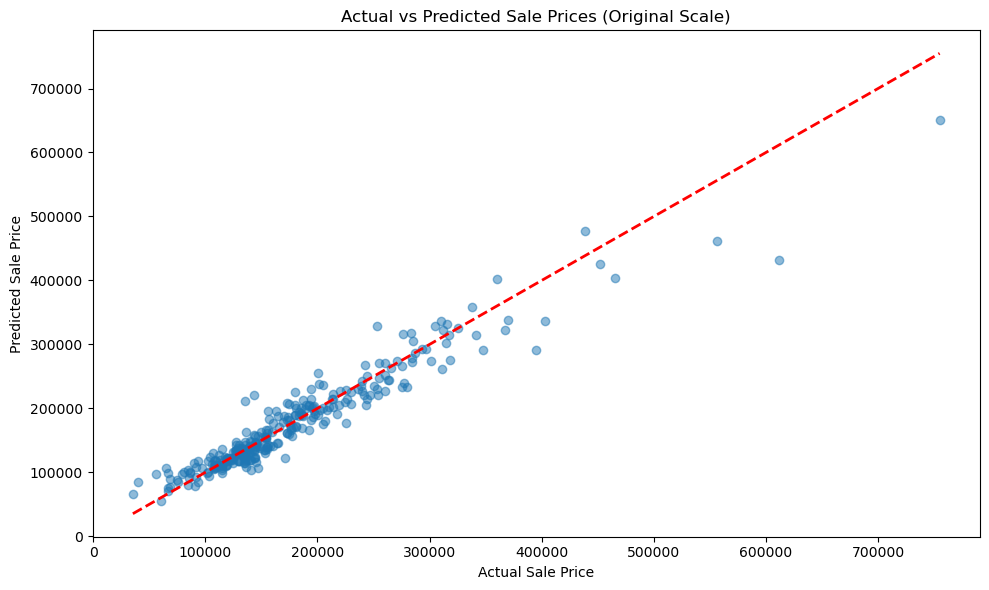

In [24]:
# Assuming y_test and y_pred are the log-transformed values:
y_test_orig = np.expm1(y_test)  # Convert back to original scale
y_pred_orig = np.expm1(y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_orig, y_pred_orig, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Prices (Original Scale)')
plt.tight_layout()
plt.show()

In [25]:
mse_new = mean_squared_error(y_test_orig, y_pred_orig)
r2_new = r2_score(y_test_orig, y_pred_orig)

print("New Test MSE:", mse_new)
print("New Test R2:", r2_new)

New Test MSE: 637560446.7627738
New Test R2: 0.9168796176927421
